# Personal Key Indicators of Heart Disease - Random Forest and Decision Tree
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

### Import Libraries

In [56]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import metrics
from pandas_profiling import ProfileReport
from dython.nominal import associations
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
%matplotlib inline

### Read CSV

In [2]:
heart = pd.read_csv('heart_2020_cleaned.csv')

### Exploratory Analysis

In [ ]:
profile = ProfileReport(heart, title = 'Heart disease',correlations = None, interactions = None, html = {'style':{'full_width' : True}})
profile

### Transform Data - Feature Engeneering

In [4]:
for i in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    heart[i]=heart[i].map(dict(Yes=1, No=0))

In [5]:
heart = pd.get_dummies(data=heart, columns=['Sex','Race','AgeCategory','GenHealth','Diabetic'])

### Define Features and Target

In [6]:
target = ['HeartDisease']
features = [x for x in heart.columns if x not in target]

### Correlation Matrix (includin categorigal data)

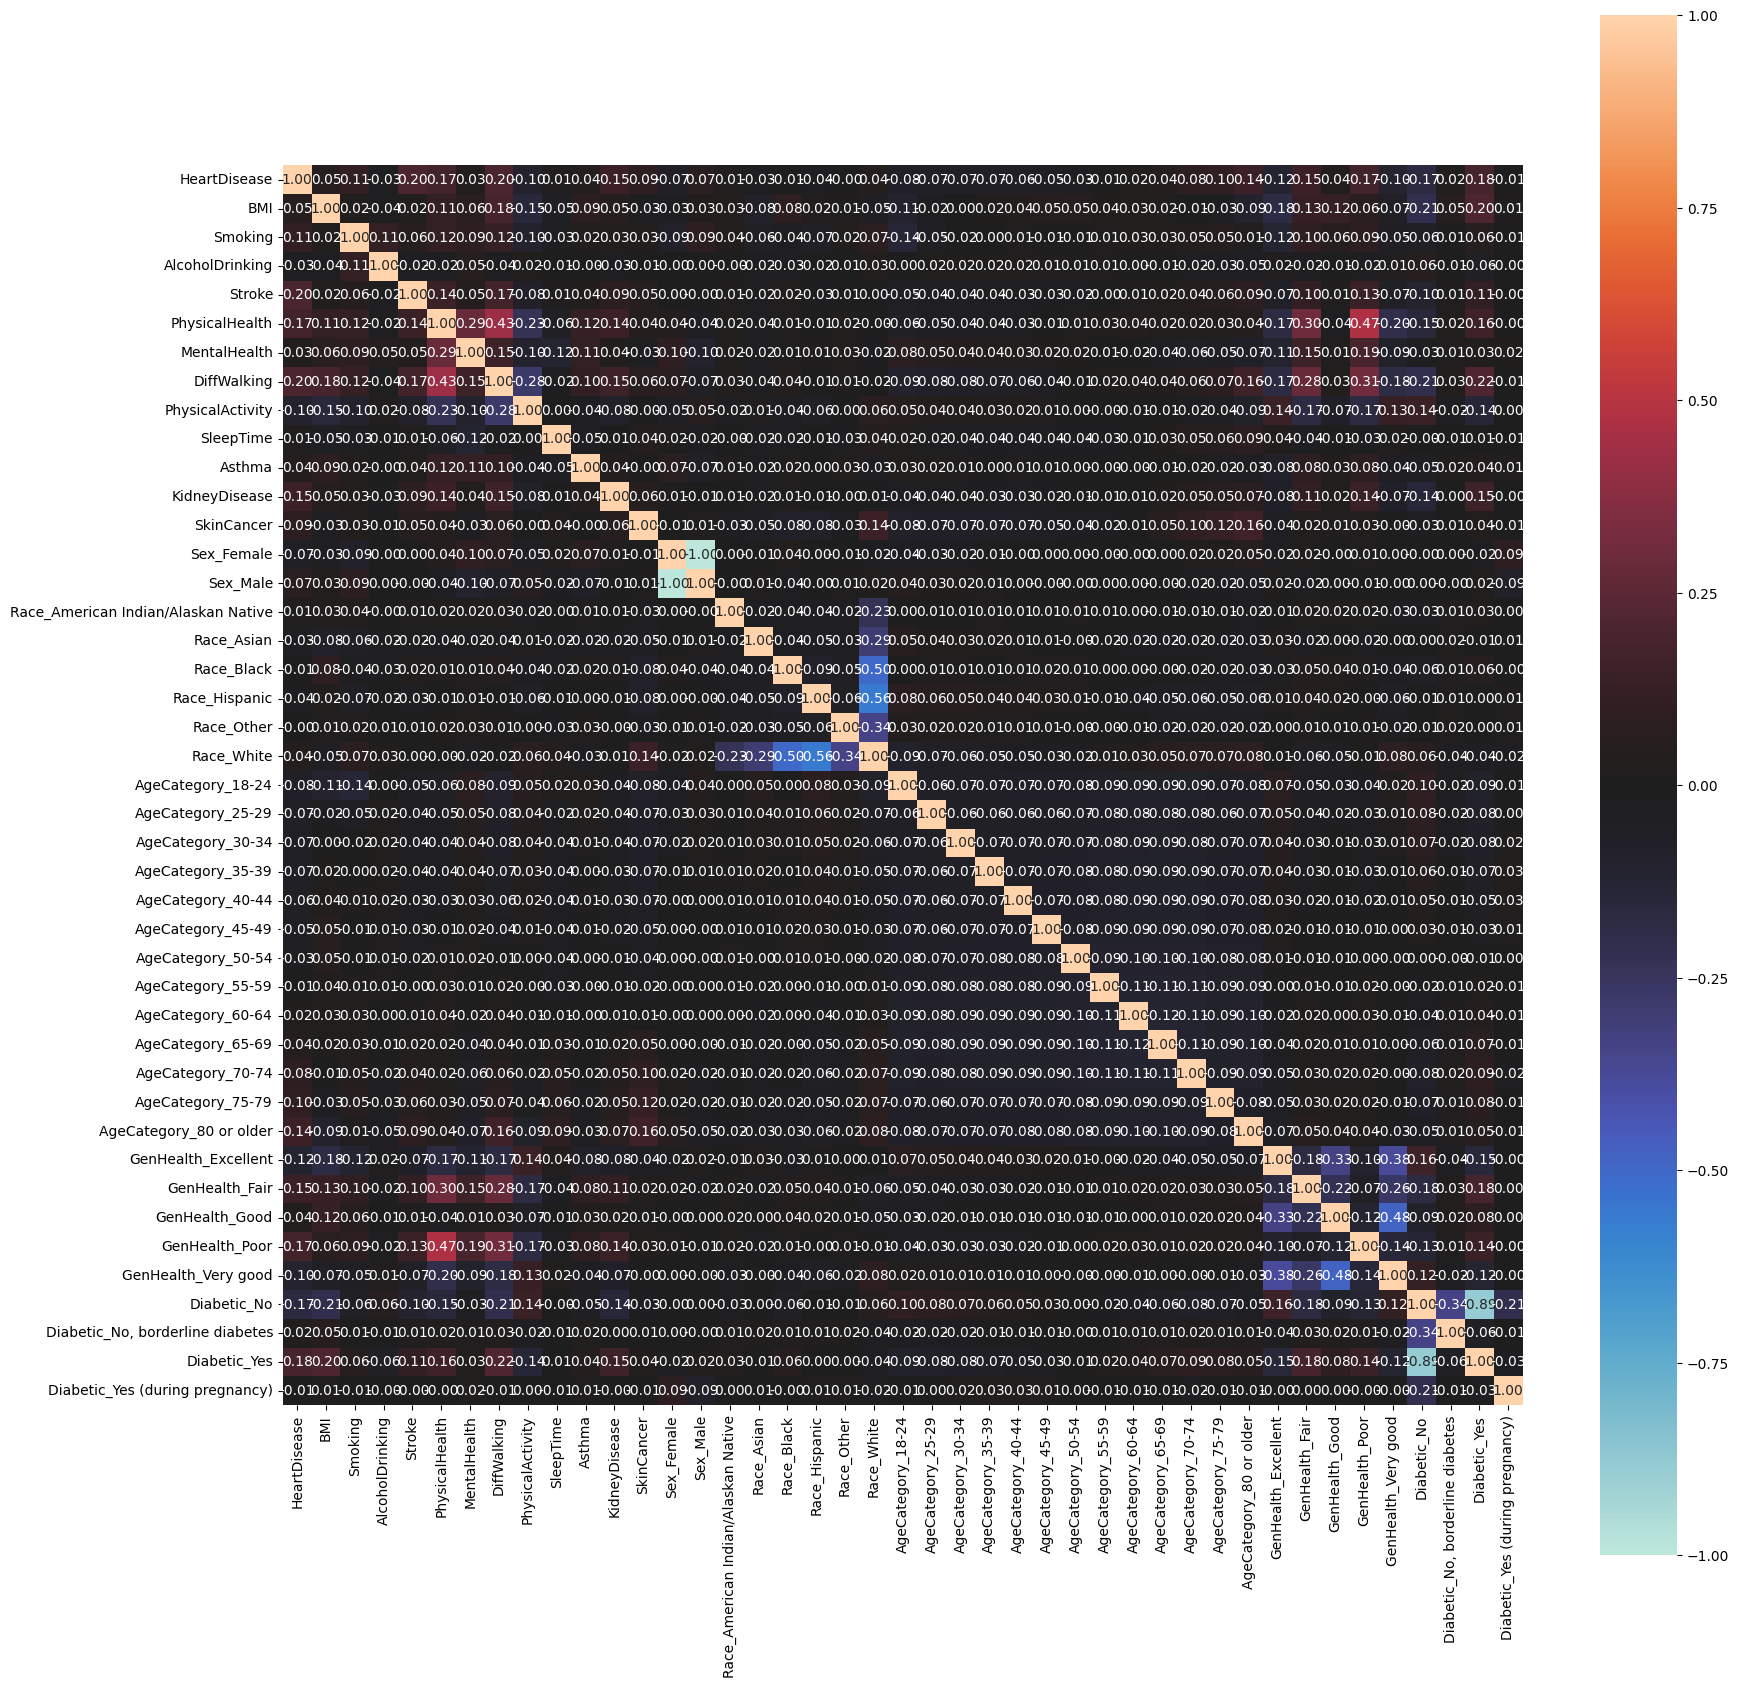

In [7]:
associations(heart, figsize=(20, 20));

# Split train/test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(heart[features], heart[target], test_size=0.33, random_state=42)

### The base is unbalaced. Oversampling SMOTE

In [9]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)

# Random Forest

### Random Forest GridSearch

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [16]:
param_grid = {
    'max_depth':[33, 36, 39],
    'n_estimators':[250,260,270,280,290,300,310,320,330,340],
    'min_samples_split': [5,8,10,15,20,25,30,35,40,50,60,70]
}

#rfc_grd_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=3, cv=3, n_jobs=1)
#rfc_grd_search.fit(X_train_smote, y_train_smote.values.ravel())
#rfc_grd_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
[CV 1/3] END max_depth=33, min_samples_split=5, n_estimators=250;, score=0.868 total time= 2.8min
[CV 2/3] END max_depth=33, min_samples_split=5, n_estimators=250;, score=0.947 total time= 2.5min
[CV 3/3] END max_depth=33, min_samples_split=5, n_estimators=250;, score=0.947 total time= 2.4min
[CV 1/3] END max_depth=33, min_samples_split=5, n_estimators=260;, score=0.868 total time= 2.5min
[CV 2/3] END max_depth=33, min_samples_split=5, n_estimators=260;, score=0.947 total time= 2.3min
[CV 3/3] END max_depth=33, min_samples_split=5, n_estimators=260;, score=0.947 total time= 2.4min
[CV 1/3] END max_depth=33, min_samples_split=5, n_estimators=270;, score=0.868 total time= 2.3min
[CV 2/3] END max_depth=33, min_samples_split=5, n_estimators=270;, score=0.947 total time= 2.4min
[CV 3/3] END max_depth=33, min_samples_split=5, n_estimators=270;, score=0.947 total time= 2.5min
[CV 1/3] END max_depth=33, min_samples_split=5, n_esti

{'max_depth': 39, 'min_samples_split': 5, 'n_estimators': 330}

### Create model with grid search parameters

In [55]:
#{'max_depth': 39, 'min_samples_split': 5, 'n_estimators': 330}

paran = {'max_depth': 39, 'min_samples_split': 5, 'n_estimators': 330}
rfc_model = RandomForestClassifier(random_state=42, **paran)

### Fit the model

In [41]:
rfc_model.fit(X_train_smote, y_train_smote.values.ravel())

RandomForestClassifier(max_depth=39, min_samples_split=5, n_estimators=330,
                       random_state=42)

### Predict values

In [45]:
y_pred = rfc_model.predict(X_test)

### Random Forest Metrics results 

In [46]:
print('Random Forest Model metrics')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('recall:          ', recall_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('F1:              ', f1_score(y_pred=y_pred,y_true=y_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=y_pred,y_true=y_test.values.ravel()))

Random Forest Model metrics
accuracy_score:   0.8819231899026845
precision_score:  0.2769023569023569
recall:           0.22474857892435504
F1:               0.24811440294454837
AUC Score :       0.5845224452955541


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     96385
           1       0.28      0.22      0.25      9148

    accuracy                           0.88    105533
   macro avg       0.60      0.58      0.59    105533
weighted avg       0.87      0.88      0.88    105533



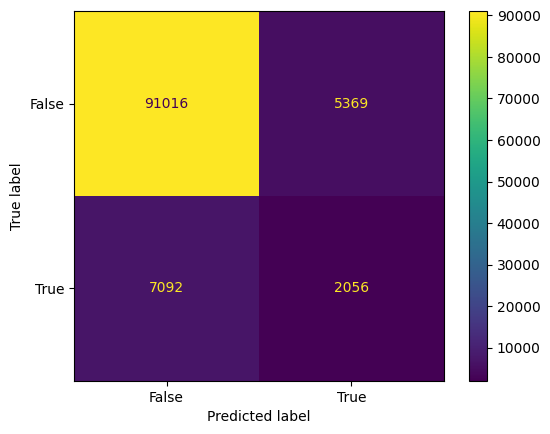

In [48]:
cf = metrics.confusion_matrix(y_test.values.ravel(), y_pred.ravel())
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

# Decision Tree

# Create Model

In [49]:
dtc_model = DecisionTreeClassifier(random_state=42)

### Train the model

In [50]:
dtc_model.fit(X_train_smote, y_train_smote.values.ravel())

DecisionTreeClassifier(random_state=42)

### Predict

In [51]:
y_pred2 = dtc_model.predict(X_test)

### Random Forest Metrics results 

In [52]:
print('Random Forest Model metrics')
print('accuracy_score:  ', accuracy_score(y_pred=y_pred2,y_true=y_test.values.ravel()))
print('precision_score: ', precision_score(y_pred=y_pred2,y_true=y_test.values.ravel()))
print('recall:          ', recall_score(y_pred=y_pred2,y_true=y_test.values.ravel()))
print('F1:              ', f1_score(y_pred=y_pred2,y_true=y_test.values.ravel()))
print('AUC Score :      ', roc_auc_score(y_score=y_pred2,y_true=y_test.values.ravel()))

Random Forest Model metrics
accuracy_score:   0.8503501274482863
precision_score:  0.20939385987929676
recall:           0.2616965456930477
F1:               0.2326417569603032
AUC Score :       0.5839581965898449


In [53]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     96385
           1       0.21      0.26      0.23      9148

    accuracy                           0.85    105533
   macro avg       0.57      0.58      0.57    105533
weighted avg       0.87      0.85      0.86    105533



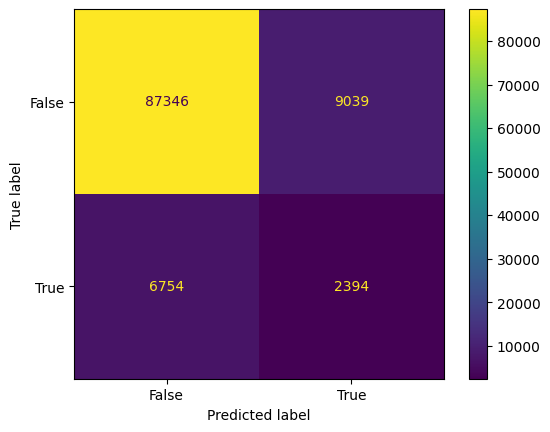

In [54]:
cf = metrics.confusion_matrix(y_test.values.ravel(), y_pred2.ravel())
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()